In [1]:
import h5py
import numpy
import matplotlib.pyplot as plt
import numpy as np 
import cv2

import torch
from torchmetrics import MetricCollection, PeakSignalNoiseRatio, StructuralSimilarityIndexMeasure
from scipy.io import loadmat

from torchmetrics import MetricCollection, PeakSignalNoiseRatio, StructuralSimilarityIndexMeasure



In [2]:
def scaleMinMax(x):

    x = np.stack([x[..., 0], x[..., 1], x[..., 0]], axis=-1)  # Select RGB channels

    # Initialize an empty list to hold the scaled channels
    scaled_channels = []
    
    # Iterate over each channel (assuming the input has shape [channels, height, width])
    for c in range(x.shape[-1]):  # Iterate over channels
        channel = x[..., c]
        
        # Min-max normalization for each channel separately
        x_min = np.min(channel)  # Minimum value for the channel
        x_max = np.max(channel)  # Maximum value for the channel
        print(x_max)
        scaled_channel = (channel - x_min) / (x_max - x_min)
        
        # Add the scaled channel to the list
        scaled_channels.append(scaled_channel)
    
    # Stack the scaled channels back together
    scaled_image = np.stack(scaled_channels, axis=-1)
    return scaled_image

In [3]:
i=-1

In [4]:
data.keys()

NameError: name 'data' is not defined

/home/nick/miniconda3/envs/pansharpening/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:62: FutureWarning: Importing `PeakSignalNoiseRatio` from `torchmetrics` was deprecated and will be removed in 2.0. Import `PeakSignalNoiseRatio` from `torchmetrics.image` instead.
  _future_warning(
/home/nick/miniconda3/envs/pansharpening/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:62: FutureWarning: Importing `StructuralSimilarityIndexMeasure` from `torchmetrics` was deprecated and will be removed in 2.0. Import `StructuralSimilarityIndexMeasure` from `torchmetrics.image` instead.
  _future_warning(


26
16.437876
0.5697765
14.033982
17.66471
14.033982


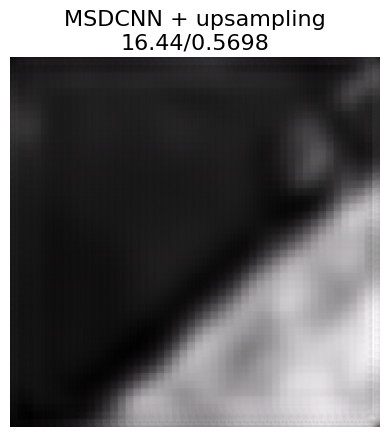

In [4]:
i=26
data = np.load(f'results/img_array_S2M_{i}.npz')
mshr = data['mssr']
mssr = data['gt']

device = "cpu"
metric_collection = MetricCollection({
        'psnr': PeakSignalNoiseRatio().to(device),
        'ssim': StructuralSimilarityIndexMeasure().to(device)})


train_metric = metric_collection.forward(torch.from_numpy(mssr).permute(0,3,1,2), torch.from_numpy(mshr).permute(0,3,1,2))
large_metric = metric_collection.compute()
metric_collection.reset()
psnr_t = large_metric['psnr'].numpy()
ssim_t = large_metric['ssim'].numpy()



print(i)
print(psnr_t)
print(ssim_t)
plt.imshow(scaleMinMax(mshr[0]))
plt.title(f"MSDCNN + upsampling\n{psnr_t:.2f}/{ssim_t:.4f}", fontsize=16)
plt.axis('off')
plt.show()
